# EDA

https://cogcomp.seas.upenn.edu/Data/QA/QC/definition.html                                        
https://cogcomp.seas.upenn.edu/Data/QA/QC/train_5500.label                                               
https://cogcomp.seas.upenn.edu/Data/QA/QC/TREC_10.label

## Libaries

In [1]:
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def process_question(row):
   return " ".join(row.split(" ")[1:])

train_df = pd.read_table("https://cogcomp.seas.upenn.edu/Data/QA/QC/train_5500.label", encoding = "ISO-8859-1", header=None)
train_df.columns = ["raw"]
train_df['category'] = train_df.apply (lambda row: row["raw"].split(":")[0], axis=1)
train_df['subcategory'] = train_df.apply (lambda row: row["raw"].split(" ")[0].split(":")[1], axis=1)
train_df['question'] = train_df.apply (lambda row: process_question(row["raw"]), axis=1)

train_df

,raw,category,subcategory,question
0,DESC:manner How did serfdom develop in and the...,DESC,manner,How did serfdom develop in and then leave Russ...
1,ENTY:cremat What films featured the character ...,ENTY,cremat,What films featured the character Popeye Doyle ?
2,DESC:manner How can I find a list of celebriti...,DESC,manner,How can I find a list of celebrities ' real na...
3,ENTY:animal What fowl grabs the spotlight afte...,ENTY,animal,What fowl grabs the spotlight after the Chines...
4,ABBR:exp What is the full form of .com ?,ABBR,exp,What is the full form of .com ?
...,...,...,...,...
5447,ENTY:other What 's the shape of a camel 's spi...,ENTY,other,What 's the shape of a camel 's spine ?
5448,ENTY:currency What type of currency is used in...,ENTY,currency,What type of currency is used in China ?
5449,NUM:temp What is the temperature today ?,NUM,temp,What is the temperature today ?
5450,NUM:temp What is the temperature for cooking ?,NUM,temp,What is the temperature for cooking ?


In [3]:
test_df = pd.read_table("https://cogcomp.seas.upenn.edu/Data/QA/QC/TREC_10.label", encoding = "ISO-8859-1", header=None)
test_df.columns = ["raw"]
test_df['category'] = train_df.apply (lambda row: row["raw"].split(":")[0], axis=1)
test_df['subcategory'] = train_df.apply (lambda row: row["raw"].split(" ")[0].split(":")[1], axis=1)
test_df['question'] = train_df.apply (lambda row: process_question(row["raw"]), axis=1)

test_df

,raw,category,subcategory,question
0,NUM:dist How far is it from Denver to Aspen ?,DESC,manner,How did serfdom develop in and then leave Russ...
1,"LOC:city What county is Modesto , California in ?",ENTY,cremat,What films featured the character Popeye Doyle ?
2,HUM:desc Who was Galileo ?,DESC,manner,How can I find a list of celebrities ' real na...
3,DESC:def What is an atom ?,ENTY,animal,What fowl grabs the spotlight after the Chines...
4,NUM:date When did Hawaii become a state ?,ABBR,exp,What is the full form of .com ?
...,...,...,...,...
495,HUM:ind Who was the 22nd President of the US ?,ENTY,cremat,What is the Jewish bible called ?
496,ENTY:currency What is the money they use in Za...,DESC,reason,Why is the grass green ?
497,NUM:count How many feet in a mile ?,DESC,def,What is a firewall ?
498,ENTY:substance What is the birthstone of Octob...,HUM,ind,What spy novelist served as Moscow corresponde...


In [4]:
train_df.head(5)

#describe
train_df.describe()
test_df.describe()

,raw,category,subcategory,question
count,500,500,500,500
unique,500,6,38,498
top,ENTY:other What did Edward Binney and Howard S...,ENTY,ind,What is the speed of the Mississippi River ?
freq,1,113,84,3



## question:
    - shape 
    - size
    - info: 
        count: row, unique categories, subcategories
    - witch catagories, subcategories, same in both dataframes
    - distribution
    - len questions (count token)
    

 

In [5]:
# print test, train shape
print(f'---shapes---\ntrain:\t{train_df.shape}\ntest:\t{test_df.shape}')

---shapes---
train:	(5452, 4)
test:	(500, 4)


In [6]:
# number of row of columns
print(f'train_size:\t{train_df.size}\ntest_size:\t{test_df.size}') 

train_size:	21808
test_size:	2000


In [7]:
# line occupancy    
print(f'---train---:\n {train_df.nunique()}\n')
print(f'---test---:\n {test_df.nunique()}')

---train---:
 raw            5382
category          6
subcategory      47
question       5381
dtype: int64

---test---:
 raw            500
category         6
subcategory     38
question       498
dtype: int64


In [8]:
#which categories?
print(f"unique categories: {train_df['category'].unique()}")
#same categories in train and test?
train_df['category'].unique() == test_df['category'].unique()


unique catagories: ['DESC' 'ENTY' 'ABBR' 'HUM' 'NUM' 'LOC']


array([ True,  True,  True,  True,  True,  True])

In [9]:
# load dictionary as dict
#which categories are not used?.
#which categories are used in train and test?

print(f"unique subcategories: {train_df['subcategory'].unique()}")





unique subcatagories: ['manner' 'cremat' 'animal' 'exp' 'ind' 'gr' 'title' 'def' 'date' 'reason'
 'event' 'state' 'desc' 'count' 'other' 'letter' 'religion' 'food'
 'country' 'color' 'termeq' 'city' 'body' 'dismed' 'mount' 'money'
 'product' 'period' 'substance' 'sport' 'plant' 'techmeth' 'volsize'
 'instru' 'abb' 'speed' 'word' 'lang' 'perc' 'code' 'dist' 'temp' 'symbol'
 'ord' 'veh' 'weight' 'currency']


category
ABBR      86
DESC    1162
ENTY    1250
HUM     1223
LOC      835
NUM      896
Name: subcategory, dtype: int64


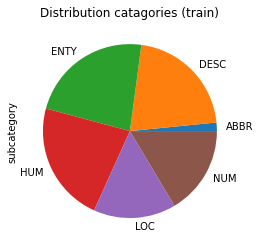

In [10]:
# distribution categories (train)
dist_train_cat = train_df.groupby('category')['subcategory'].count()
print(dist_train_cat)
dist_train_cat.sort_values(ascending=False)

#visualisation 
dist_train_cat.plot.pie()
plt.title('Distribution categories (train)')
plt.show()


In [11]:
type(dist_train_cat)
dist_train_cat.values

array([  86, 1162, 1250, 1223,  835,  896])

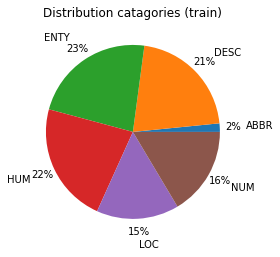

In [12]:
plt.pie(dist_train_cat,labels=dist_train_cat.index, autopct='%1.0f%%', pctdistance=1.15, labeldistance=1.3) 
plt.title('Distribution categories (train)')
plt.show()

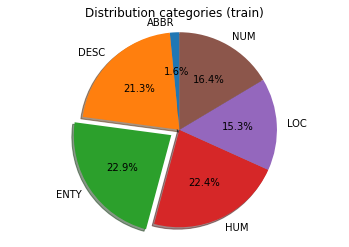

In [13]:
# Pie chart, where the slices will show the max_category:
labels=dist_train_cat.index
sizes = dist_train_cat
explode = (0, 0, 0.1, 0, 0, 0)  # only "explode" the 3nd slice (max_category)

fig1, ax1 = plt.subplots()
ax1.pie(dist_train_cat, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution categories (train)')
plt.show()

category
ABBR     11
DESC    113
ENTY    113
HUM     110
LOC      78
NUM      75
Name: subcategory, dtype: int64


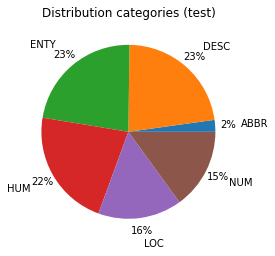

In [14]:
# distribution categories (test)
dist_test_cat = test_df.groupby('category')['subcategory'].count()
dist_test_cat.sort_values(ascending=False)
print(dist_test_cat)

plt.pie(dist_test_cat,labels=dist_test_cat.index, autopct='%1.0f%%', pctdistance=1.15, labeldistance=1.3) 
plt.title('Distribution categories (test)')
plt.show()

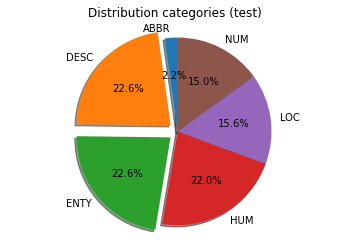

In [15]:
# Pie chart, where the slices will show the max_categories:
labels=dist_test_cat.index
explode = (0, 0.1, 0.1, 0, 0, 0)  # only "explode" the slice (max_categories)

fig1, ax1 = plt.subplots()
ax1.pie(dist_test_cat, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution categories (test)')
plt.show()

In [16]:
# distribution subcategories (train)
dist_train_sub = train_df.subcategory.groupby(train_df['category']).value_counts()
print(dist_train_sub)

category  subcategory
ABBR      exp             70
          abb             16
DESC      def            421
          manner         276
          desc           274
          reason         191
ENTY      other          217
          cremat         207
          animal         112
          dismed         103
          food           103
          termeq          93
          sport           62
          event           56
          product         42
          substance       41
          color           40
          techmeth        38
          veh             27
          word            26
          body            16
          lang            16
          plant           13
          symbol          11
          instru          10
          letter           9
          currency         4
          religion         4
HUM       ind            962
          gr             189
          desc            47
          title           25
LOC       other          464
          country    

In [17]:
#first 20 subcategories
print(f'first 20: {dist_train_sub.sort_values(ascending=False)[:20]}')

first 20: category  subcategory
HUM       ind            962
LOC       other          464
DESC      def            421
NUM       count          363
DESC      manner         276
          desc           274
NUM       date           218
ENTY      other          217
          cremat         207
DESC      reason         191
HUM       gr             189
LOC       country        155
          city           129
ENTY      animal         112
          dismed         103
          food           103
          termeq          93
NUM       period          75
          money           71
ABBR      exp             70
Name: subcategory, dtype: int64


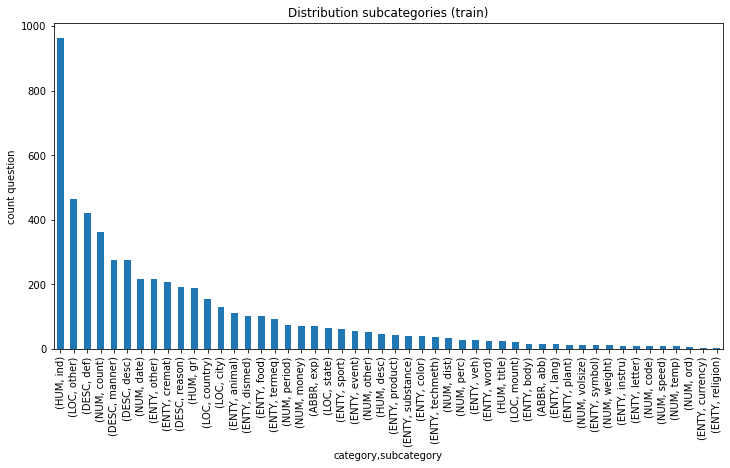

In [18]:
fig= plt.figure(figsize=(12,6))
dist_train_sub.sort_values(ascending=False).plot.bar(label='train')
plt.ylabel('count question')
plt.title('Distribution subcategories (train)')
plt.show()

In [19]:
# distribution subcategories (test)
dist_test_sub = test_df.subcategory.groupby(test_df['category']).value_counts()
print(dist_test_sub)


category  subcategory
ABBR      exp             9
          abb             2
DESC      def            40
          manner         29
          desc           23
          reason         21
ENTY      other          22
          cremat         21
          animal         16
          food            7
          termeq          7
          dismed          6
          techmeth        6
          body            5
          event           5
          color           3
          product         3
          sport           3
          instru          2
          substance       2
          lang            1
          letter          1
          plant           1
          religion        1
          word            1
HUM       ind            84
          gr             21
          desc            3
          title           2
LOC       other          41
          city           12
          country        12
          state           8
          mount           5
NUM       count          3

In [20]:
print(f'first 20: {dist_train_sub.sort_values(ascending=False)[:20]}')

first 20: category  subcategory
HUM       ind            962
LOC       other          464
DESC      def            421
NUM       count          363
DESC      manner         276
          desc           274
NUM       date           218
ENTY      other          217
          cremat         207
DESC      reason         191
HUM       gr             189
LOC       country        155
          city           129
ENTY      animal         112
          dismed         103
          food           103
          termeq          93
NUM       period          75
          money           71
ABBR      exp             70
Name: subcategory, dtype: int64


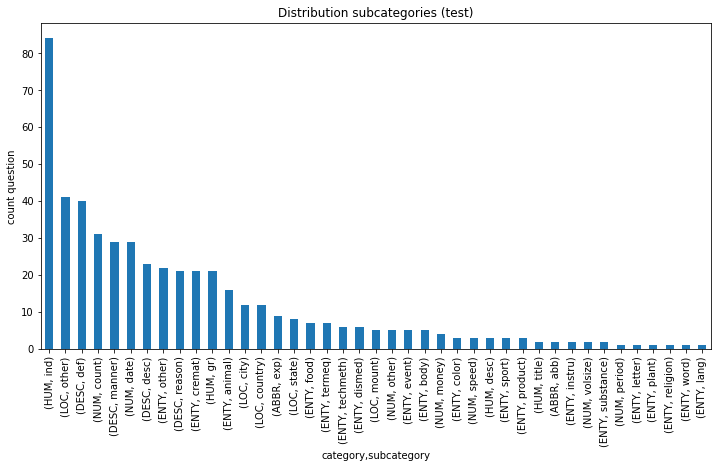

In [21]:
plt.figure(figsize=(12,6))
dist_test_sub.sort_values(ascending=False).plot.bar(label='test')
plt.ylabel('count question')
plt.title('Distribution subcategories (test)')
plt.show()

In [22]:
#plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

In [23]:
#test_df with only 38 subcategories compared to 47 in train_df
n = 14   #input for nlargest
train_df.subcategory.value_counts().nlargest(n).sum()

p = (train_df.subcategory.value_counts().nlargest(n).sum())/len(train_df)
print(f'The {n} largest subcategories account for a proportion of {p}')

The 14 largest subcategories account for a proportion of 0.8033749082905356


In [24]:
train_df.subcategory.value_counts().nlargest(n)

top_subcategories = list((train_df.subcategory.value_counts().nlargest(n)).index)
top_subcategories

train_df_top = train_df.loc[train_df['subcategory'].isin(top_subcategories)]
print(f'The {n} largest subcategories have {len(train_df_top)} questions.')

The 14 largest subcategories have 4380 questions.


In [25]:
train_df_top.sample(10)
train_df_top.subcategory.groupby(train_df['category']).value_counts()

#More than 80% of the data can be assigned to only 14 out of 47 subcategories in train_df

test_df.subcategory.value_counts().nlargest(39)

ind          84
other        68
def          40
count        31
manner       29
date         29
desc         26
cremat       21
gr           21
reason       21
animal       16
country      12
city         12
exp           9
state         8
termeq        7
food          7
dismed        6
techmeth      6
mount         5
body          5
event         5
money         4
sport         3
speed         3
product       3
color         3
abb           2
title         2
volsize       2
instru        2
substance     2
word          1
letter        1
period        1
plant         1
lang          1
religion      1
Name: subcategory, dtype: int64

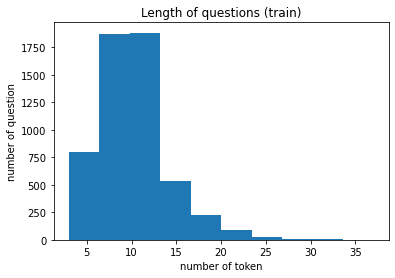

In [26]:
#len text
plt.hist(train_df['question'].apply(lambda text: len(text.split())))
plt.xlabel('number of token')
plt.ylabel('number of question')
plt.title('Length of questions (train)')
plt.show()

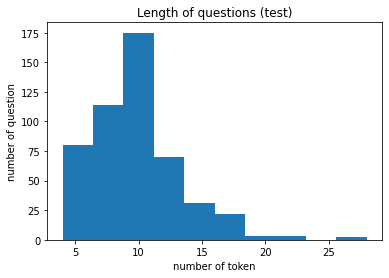

In [27]:
#len text in test_df.question
plt.hist(test_df['question'].apply(lambda text: len(text.split())))
plt.xlabel('number of token')
plt.ylabel('number of question')
plt.title('Length of questions (test)');

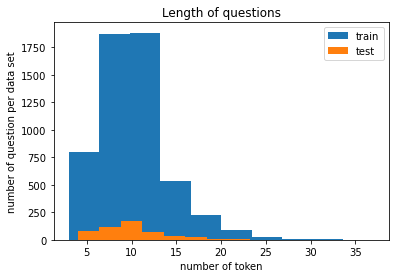

In [28]:
ax1 = plt.hist(train_df['question'].apply(lambda text: len(text.split())),label='train')
ax2 = plt.hist(test_df['question'].apply(lambda text: len(text.split())), label='test')
plt.legend()
plt.xlabel('number of token')
plt.ylabel('number of question per data set')
plt.title('Length of questions')
plt.show()

In [29]:
#average length of question
al_train = round(train_df['question'].apply(lambda text: len(text.split())).mean())
al_test = round(test_df['question'].apply(lambda text: len(text.split())).mean())
print(f'The questions in the train data set have an average of {al_train} tokens,\
 and {al_test} tokens in the test data set.')

The questions in the train data set have an average of 10 tokens, and 10 tokens in the test data set.


In [30]:
train_question_df = train_df['question'].str.split(" ", expand=True)
train_question_df 

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,How,did,serfdom,develop,in,and,then,leave,Russia,?,...,None,None,None,None,None,None,None,None,None,None
1,What,films,featured,the,character,Popeye,Doyle,?,None,None,...,None,None,None,None,None,None,None,None,None,None
2,How,can,I,find,a,list,of,celebrities,',real,...,None,None,None,None,None,None,None,None,None,None
3,What,fowl,grabs,the,spotlight,after,the,Chinese,Year,of,...,None,None,None,None,None,None,None,None,None,None
4,What,is,the,full,form,of,.com,?,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447,What,'s,the,shape,of,a,camel,'s,spine,?,...,None,None,None,None,None,None,None,None,None,None
5448,What,type,of,currency,is,used,in,China,?,None,...,None,None,None,None,None,None,None,None,None,None
5449,What,is,the,temperature,today,?,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5450,What,is,the,temperature,for,cooking,?,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [31]:
#percentage distribution of tokens (train)
for column in train_question_df.columns:
    nan_sum = train_question_df[column].isnull().sum()
    print(column,': ',round(100.00-(nan_sum*100/len(train_question_df)),2))

0 :  100.0
1 :  100.0
2 :  100.0
3 :  99.93
4 :  97.45
5 :  92.53
6 :  85.29
7 :  74.91
8 :  63.35
9 :  50.99
10 :  40.24
11 :  30.5
12 :  21.88
13 :  16.45
14 :  12.84
15 :  9.3
16 :  6.68
17 :  4.99
18 :  3.52
19 :  2.46
20 :  1.89
21 :  1.32
22 :  0.97
23 :  0.77
24 :  0.53
25 :  0.39
26 :  0.29
27 :  0.28
28 :  0.22
29 :  0.15
30 :  0.13
31 :  0.07
32 :  0.04
33 :  0.04
34 :  0.02
35 :  0.02
36 :  0.02


In [32]:
test_question_df = test_df['question'].str.split(" ", expand=True)
test_question_df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,How,did,serfdom,develop,in,and,then,leave,Russia,?,...,None,None,None,None,None,None,None,None,None,None
1,What,films,featured,the,character,Popeye,Doyle,?,None,None,...,None,None,None,None,None,None,None,None,None,None
2,How,can,I,find,a,list,of,celebrities,',real,...,None,None,None,None,None,None,None,None,None,None
3,What,fowl,grabs,the,spotlight,after,the,Chinese,Year,of,...,None,None,None,None,None,None,None,None,None,None
4,What,is,the,full,form,of,.com,?,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,What,is,the,Jewish,bible,called,?,None,None,None,...,None,None,None,None,None,None,None,None,None,None
496,Why,is,the,grass,green,?,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
497,What,is,a,firewall,?,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
498,What,spy,novelist,served,as,Moscow,correspondent,for,Reuter,and,...,None,None,None,None,None,None,None,None,None,None


In [33]:
#percentage distribution of tokens (test)
for column in test_question_df.columns:
    nan_sum = test_question_df[column].isnull().sum()
    print(column,': ',round(100.00-(nan_sum*100/len(test_question_df)),2))

0 :  100.0
1 :  100.0
2 :  100.0
3 :  100.0
4 :  97.2
5 :  92.2
6 :  84.0
7 :  73.4
8 :  61.2
9 :  48.0
10 :  36.6
11 :  26.2
12 :  18.6
13 :  12.2
14 :  9.0
15 :  6.0
16 :  4.6
17 :  3.2
18 :  1.6
19 :  1.2
20 :  1.0
21 :  0.8
22 :  0.6
23 :  0.4
24 :  0.4
25 :  0.4
26 :  0.2
27 :  0.2


In [34]:
def checkIfDuplicates_1(listOfElems):
    ''' Check if given list contains any duplicates '''
    if len(listOfElems) == len(set(listOfElems)):
        return False
    else:
        return True


In [35]:
checkIfDuplicates_1(list(train_df.question))

True

In [36]:
checkIfDuplicates_1(list(test_df.question))

True